In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 584
['blackmans bay', 'pregradnaya', 'petropavlovsk-kamchatsky', 'polyarnyy', 'olonkinbyen', 'albany', 'island harbour', 'hithadhoo', 'papatowai', 'eyl', 'stanley', 'wailua homesteads', 'tindouf', 'ceprano', 'ushuaia', 'bilibino', 'luderitz', 'iqaluit', 'uturoa', 'altamira', 'waingapu', 'margate', 'margaret river', 'ust-nera', 'waitangi', 'kourou', 'undurkhaan', 'magadan', 'champerico', 'grytviken', 'east london', 'west island', 'port lincoln', 'edinburgh of the seven seas', 'suva', 'bethel', 'kerrville', 'weyburn', 'chonchi', 'tazacorte', "ust'-ilimsk", 'queenstown', 'pangody', 'port-aux-francais', 'arrifes', 'malango', 'puerto natales', 'remire-montjoly', 'choele choel', 'cabo san lucas', "kapa'a", 'saudarkrokur', 'chibougamau', 'ilulissat', 'ugoofaaru', 'ola', 'hawaiian paradise park', 'port alfred', 'broome', 'slave lake', 'avarua', 'greymouth', 'jalqani', "hayma'", 'callao', "val-d'or", 'ribeira grande', 'sumbe', 'jamestown', 'anadyr', 'yellowknife', 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=metric&appid={weather_api_key}"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and data
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | pregradnaya
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | polyarnyy
Processing Record 5 of Set 1 | olonkinbyen
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | island harbour
Processing Record 8 of Set 1 | hithadhoo
Processing Record 9 of Set 1 | papatowai
Processing Record 10 of Set 1 | eyl
Processing Record 11 of Set 1 | stanley
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | tindouf
Processing Record 14 of Set 1 | ceprano
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | luderitz
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | uturoa
Processing Record 20 of Set 1 | altamira
Processing Record 21 of Set 1 | waingapu
Processing Record 22 of Set 1 | margate
Processing Record

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,19.85,67,26,0.89,AU,1702335030
1,pregradnaya,43.9508,41.1994,7.61,64,100,1.16,RU,1702335031
2,petropavlovsk-kamchatsky,53.0452,158.6483,-9.67,87,40,7.60,RU,1702335033
3,polyarnyy,69.1989,33.4478,-12.96,91,96,6.91,RU,1702335034
4,olonkinbyen,70.9221,-8.7187,-0.06,98,100,6.30,SJ,1702335035


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,19.85,67,26,0.89,AU,1702335030
1,pregradnaya,43.9508,41.1994,7.61,64,100,1.16,RU,1702335031
2,petropavlovsk-kamchatsky,53.0452,158.6483,-9.67,87,40,7.60,RU,1702335033
3,polyarnyy,69.1989,33.4478,-12.96,91,96,6.91,RU,1702335034
4,olonkinbyen,70.9221,-8.7187,-0.06,98,100,6.30,SJ,1702335035


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

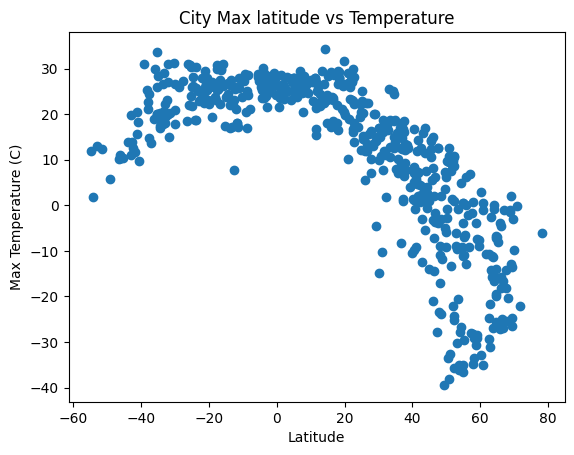

In [10]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
lat_temp = plt.scatter(x,y)
# Incorporate the other graph properties
plt.title("City Max latitude vs Temperature")
plt.xlabel('Latitude')  
plt.ylabel('Max Temperature (C)') 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

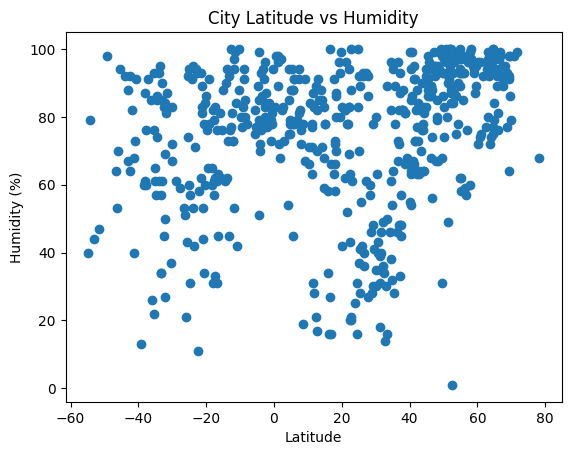

In [11]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
x = city_data_df['Lat']
y = city_data_df['Humidity']
lat_hum = plt.scatter(x,y)
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')  
plt.ylabel('Humidity (%)') 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

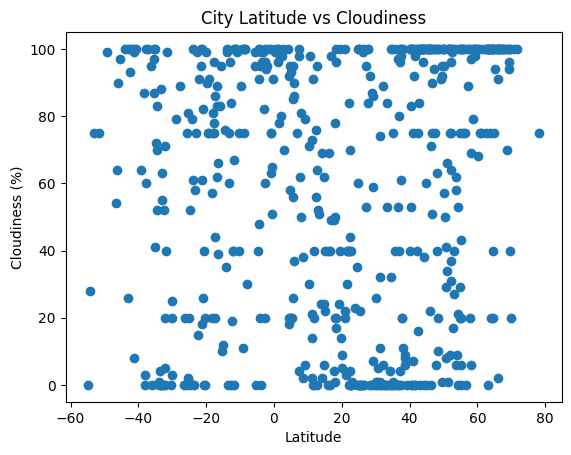

In [12]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
lat_cloud = plt.scatter(x,y)
# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')  
plt.ylabel('Cloudiness (%)') 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

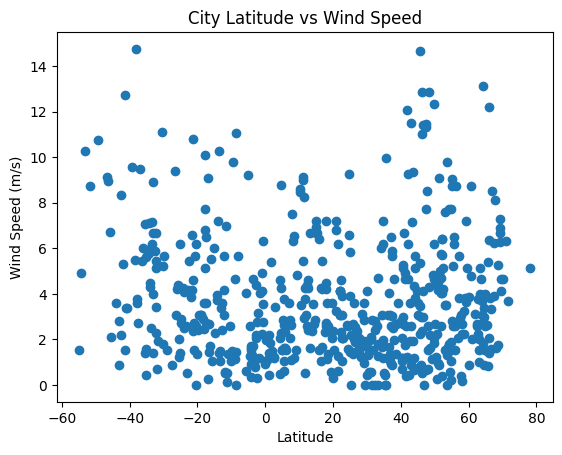

In [13]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
lat_wind = plt.scatter(x,y)
# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')  
plt.ylabel('Wind Speed (m/s)') 

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
from numpy.polynomial.polynomial import polyfit
from scipy import stats

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,pregradnaya,43.9508,41.1994,7.61,64,100,1.16,RU,1702335031
2,petropavlovsk-kamchatsky,53.0452,158.6483,-9.67,87,40,7.60,RU,1702335033
3,polyarnyy,69.1989,33.4478,-12.96,91,96,6.91,RU,1702335034
4,olonkinbyen,70.9221,-8.7187,-0.06,98,100,6.30,SJ,1702335035
5,albany,42.6001,-73.9662,2.23,73,16,3.58,US,1702335036


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,19.85,67,26,0.89,AU,1702335030
7,hithadhoo,-0.6000,73.0833,27.61,78,51,2.76,MV,1702335038
8,papatowai,-46.5619,169.4708,10.17,64,54,9.14,NZ,1702335039
14,ushuaia,-54.8000,-68.3000,11.81,40,0,1.54,AR,1702335046
16,luderitz,-26.6481,15.1594,18.59,53,0,9.41,NaN,1702335048


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.669964


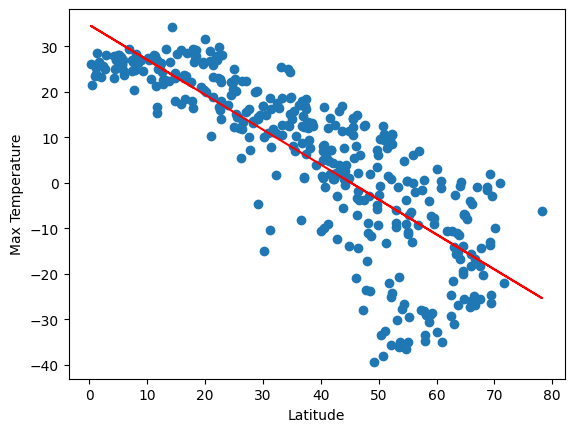

In [26]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
plt.xlabel('Latitude')  
plt.ylabel('Max Temperature')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.show()

R-squared: 0.318501


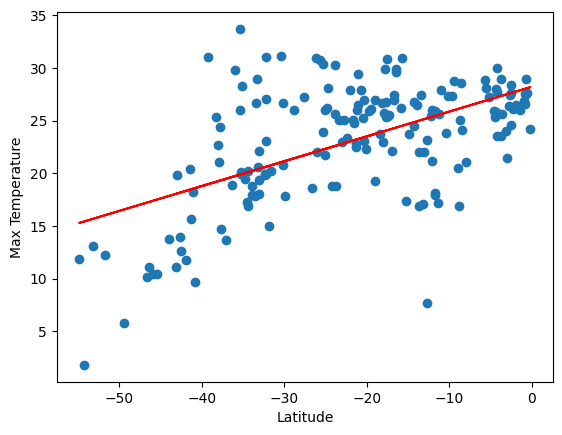

In [25]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
plt.xlabel('Latitude')  
plt.ylabel('Max Temperature')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.show()

**Discussion about the linear relationship:** Temperatures correlates with Latitude. As the Latitude decreases, the temperature also decreases.

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.100432


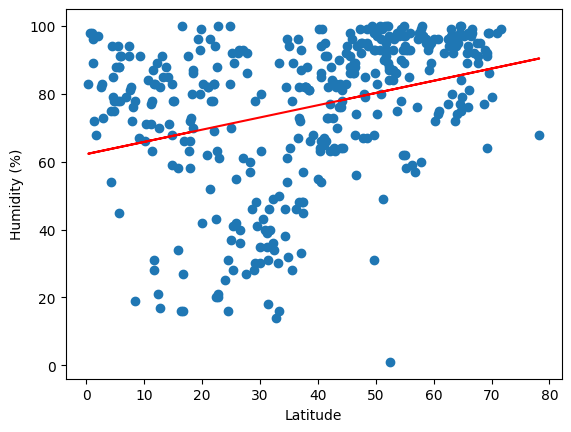

In [19]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
plt.xlabel('Latitude')  
plt.ylabel('Humidity (%)')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.xlabel('Latitude')  
plt.show()

R-squared: 0.071365


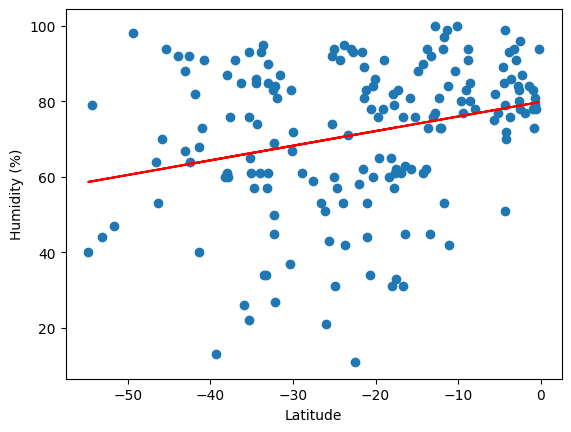

In [20]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
plt.xlabel('Latitude')  
plt.ylabel('Humidity (%)')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.show()

**Discussion about the linear relationship:** Humidity does not correlate with Latitude.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.074121


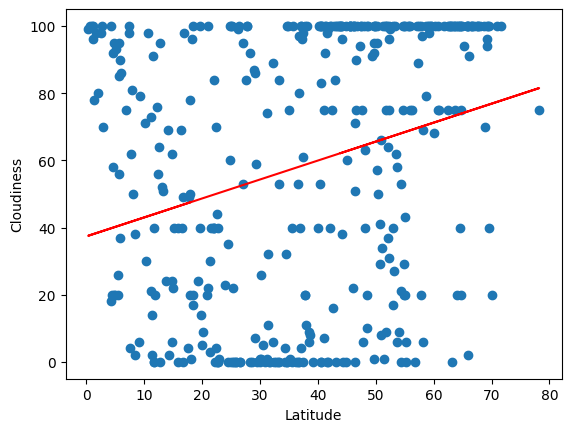

In [21]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
plt.xlabel('Latitude')  
plt.ylabel('Cloudiness')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.show()

R-squared: 0.020562


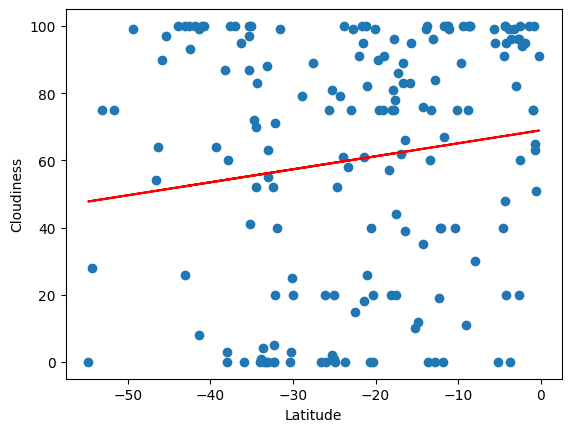

In [22]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
plt.xlabel('Latitude')  
plt.ylabel('Cloudiness')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.show()

**Discussion about the linear relationship:** There are no clear patterns or relationships between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.018759


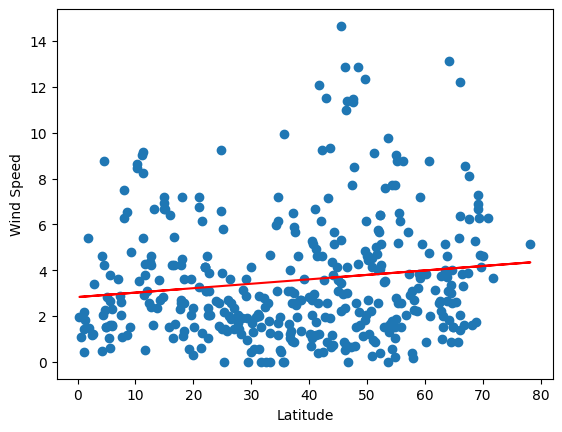

In [23]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.xlabel('Latitude')  
plt.ylabel('Wind Speed')
plt.show()

R-squared: 0.115972


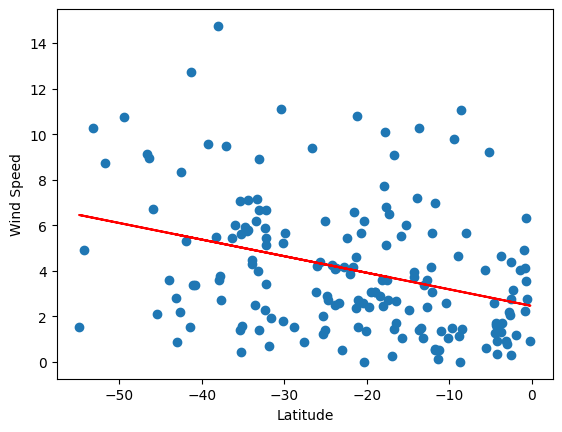

In [24]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
plt.xlabel('Latitude')  
plt.ylabel('Wind Speed')
res = stats.linregress(x, y)
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(x, y, 'o')
plt.plot(x, res.intercept + res.slope*x, 'r')
plt.show()

**Discussion about the linear relationship:** There are no clear patterns or relationships between latitude and wind speed.